In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
# Importing the dataset
dataset = pd.read_csv('Wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values



In [3]:
# Function for applying PCA
def apply_PCA(indep_X):
    pca = PCA(n_components=2)
    X_transformed = pca.fit_transform(indep_X)
    explained_variance = pca.explained_variance_ratio_
    return X_transformed, explained_variance


# Function to split the dataset and apply scaling
def split_scale(indep_X, dep_Y):
    X_train, X_test, y_train, y_test = train_test_split(indep_X, dep_Y, test_size=0.25, random_state=0)
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    return X_train, X_test, y_train, y_test

# Function to make predictions and generate the confusion matrix
def cm_prediction(classifier, X_test, y_test):
    y_pred = classifier.predict(X_test)
    from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return classifier, accuracy, report, X_test, y_test, cm

# Function to perform logistic regression
def logistic(X_train, y_train, X_test, y_test):
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, y_train)
    return cm_prediction(classifier, X_test, y_test)

# Function to perform linear SVM
def svm_linear(X_train, y_train, X_test, y_test):
    from sklearn.svm import SVC
    classifier = SVC(kernel='linear', random_state=0)
    classifier.fit(X_train, y_train)
    return cm_prediction(classifier, X_test, y_test)

# Function to perform non-linear SVM
def svm_nl(X_train, y_train, X_test, y_test):
    from sklearn.svm import SVC
    classifier = SVC(kernel='rbf', random_state=0)
    classifier.fit(X_train, y_train)
    return cm_prediction(classifier, X_test, y_test)

# Function to perform Naive Bayes
def naive(X_train, y_train, X_test, y_test):
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(X_train, y_train)
    return cm_prediction(classifier, X_test, y_test)

# Function to perform K-NN
def knn(X_train, y_train, X_test, y_test):
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
    classifier.fit(X_train, y_train)
    return cm_prediction(classifier, X_test, y_test)

# Function to perform Decision Tree
def decision_tree(X_train, y_train, X_test, y_test):
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    return cm_prediction(classifier, X_test, y_test)

# Function to perform Random Forest
def random_forest(X_train, y_train, X_test, y_test):
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
    classifier.fit(X_train, y_train)
    return cm_prediction(classifier, X_test, y_test)



In [4]:
# Function to create a DataFrame with accuracy results
def PCA_classification(acc_log, acc_svml, acc_svmnl, acc_knn, acc_nav, acc_des, acc_rf):
    dataframe = pd.DataFrame(index=['PCA'], columns=['Logistic', 'SVMl', 'SVMnl', 'KNN', 'Navie', 'Decision', 'Random'])
    dataframe['Logistic'] = acc_log
    dataframe['SVMl'] = acc_svml
    dataframe['SVMnl'] = acc_svmnl
    dataframe['KNN'] = acc_knn
    dataframe['Navie'] = acc_nav
    dataframe['Decision'] = acc_des
    dataframe['Random'] = acc_rf
    return dataframe


In [7]:
# Applying PCA
X_pca, explained_variance = apply_PCA(X)

# Splitting and scaling the dataset
X_train, X_test, y_train, y_test = split_scale(X_pca, y)



In [9]:
# Lists to store accuracies
acc_log = []
acc_svml = []
acc_svmnl = []
acc_knn = []
acc_nav = []
acc_des = []
acc_rf = []


In [11]:
# Logistic Regression
classifier, accuracy, report, X_test, y_test, cm = logistic(X_train, y_train, X_test, y_test)
acc_log.append(accuracy)

# Linear SVM
classifier, accuracy, report, X_test, y_test, cm = svm_linear(X_train, y_train, X_test, y_test)
acc_svml.append(accuracy)

# Non-linear SVM
classifier, accuracy, report, X_test, y_test, cm = svm_nl(X_train, y_train, X_test, y_test)
acc_svmnl.append(accuracy)

# K-NN
classifier, accuracy, report, X_test, y_test, cm = knn(X_train, y_train, X_test, y_test)
acc_knn.append(accuracy)

# Naive Bayes
classifier, accuracy, report, X_test, y_test, cm = naive(X_train, y_train, X_test, y_test)
acc_nav.append(accuracy)

# Decision Tree
classifier, accuracy, report, X_test, y_test, cm = decision_tree(X_train, y_train, X_test, y_test)
acc_des.append(accuracy)

# Random Forest
classifier, accuracy, report, X_test, y_test, cm = random_forest(X_train, y_train, X_test, y_test)
acc_rf.append(accuracy)



In [12]:
# Creating a DataFrame with the results
results = PCA_classification(acc_log, acc_svml, acc_svmnl, acc_knn, acc_nav, acc_des, acc_rf)
print(results)

     Logistic      SVMl     SVMnl       KNN  Navie  Decision    Random
PCA  0.822222  0.822222  0.822222  0.711111    0.8  0.688889  0.822222


C:\Users\Dell\AppData\Local\Temp\ipykernel_10680\3907547509.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


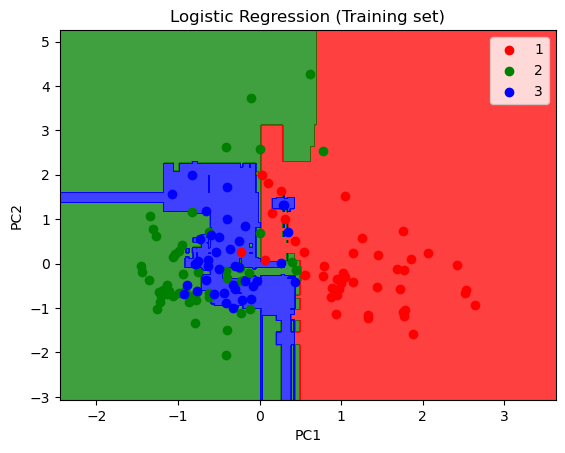

In [13]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


C:\Users\Dell\AppData\Local\Temp\ipykernel_10680\1176991918.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],


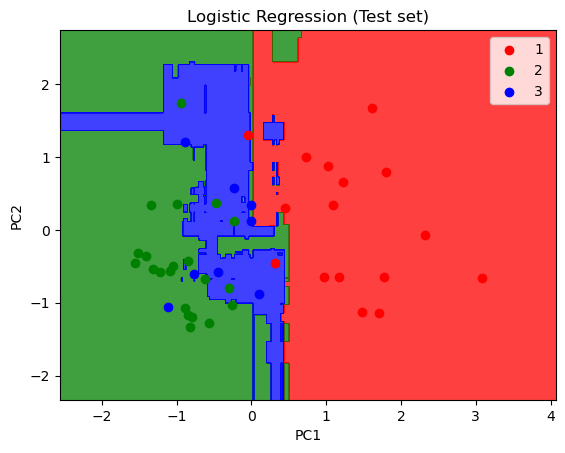

In [14]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()